# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

The purpose of this project is to analyze car listings on Crankshaft List, perform Exploratory Data Analysis and figure out which factors influence the price of the vehicle. The car listings contain information about the price, model uear, model, car condition, cylinders in the vehicle, fuel, odometer, transmission, paint color, whether or not the car is a four wheel drive, the date the add was posted, and the amount of days the car has been listed on Crankshaft List. 

**Table of Contents**

1.[Studying the general information](#general)<br>
2.[General Information Conclusion](#general_conclusion) <br>
3.[Data Preprocessing](#preprocessing) <br>
4.[Calculations](#calculations) <br>
5.[Exploratory Data Analysis](#EDA)<br>
6.[Exploratory Data Analysis Conclusion](#EDA_conclusion)<br>
7.[Removing Outliers from Data](#outliers)<br>
7.5.[Analyzing ads at Crankshaft](#analysis)<br>
8.[Overall Conclusions](#conclusion)

### 1. <a id='general'>Studying the general information</a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv("/datasets/vehicles_us.csv")
df.info()
print("======================")
df.head()

#Finding out sum & percentage of missing values in each feature.
print("======= Amount Missing =======")
missing_values_count = df.isnull().sum()
print(missing_values_count[0:10])
print("======= Percent Missing =======")
null = (df.isna().sum()/len(df)) * 100
print(null[null>0].sort_values())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
======= Amount Missing =======
price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
dtype: int64
======= Percent Missing =======
model_year      7.023775
cylinders      10.2086

### 2. <a id='general_conclusion'>General Information Conclusion</a>

Off of first glance, several columns need to be changed. Model_year: float -> int, cylinders:float -> int, is_4wd:float-> bool, and date_posted:obj -> date time object. Aside from this, I am noting missing values in the model_year, cylinders, odometer, paint_color, and is_4wd columns. At this stage of observation, I am not sure how to properly replace those missing values.

### 3. <a id='preprocessing'>Data Preprocessing</a>

This step requires me to replace the missing values in the model_year, cylinders, odometer, paint_color, and is_4wd columns and fix column types. I wanted to know the percentage of missing values in each feature first. These are the results. 

model_year      7.023775
cylinders      10.208637
odometer       15.316836
paint_color    17.985444
dtype: float64

fourwheeldrive: to replace the NaNs in fourwheeldrive, I filled the NaNs with 0. I then changed the type to bool. I did this because the NaNs were 'False', but were not entered in as such. Filling in the NaNs with 0 and changing the type to bool makes them 'False'.

paint_color: to replace the NaNs in paint_color, I found all of the unique paint colors and and put them in a list. Then I filled the NaNs in the paint color column with a random color. 

cylinders: to replace the NaNs in the cylinder column,  I got the mode of the cylinders and replaced it. .mode()[0] returns the single value in the series.

replace_model_year: Since the NaNs in the column model_year was only 7% of data, I decided to remove the NaNs as removing them would not have a big impact on my data. 

date_posted: date posted is an object so I will convert it to a datetime object so I can get the week, month and year later.

In [2]:
#dropping duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)


#replacing missing values in is_4wd columns
def fourwheeldrive(df):
    df['is_4wd'].fillna(0, inplace=True)
    df['is_4wd'] = df['is_4wd'].astype('int')

def paint_color(df):
    unique_paint_colors = df['paint_color'].unique()
    unique_paint_colors = list(filter(lambda x: x==x, unique_paint_colors))
    df['paint_color'].fillna(random.choice(unique_paint_colors), inplace=True)
    
def cylinders(df):
    cyl_mean = df.groupby(['model_year', 'model'])['cylinders']
    df['cylinders'].fillna(cyl_mean.mean()[0], inplace=True)
    df['cylinders'] = df['cylinders'].astype('int')

    
def drop_model_year(df):
    df.dropna(subset=['model_year'], inplace=True)
    df['model_year'] = df['model_year'].astype('int') 
    
def odometer(df):
    odom_vals = df['odometer'].dropna().values
    df['odometer'] = df['odometer'].apply(lambda x: random.choice(odom_vals) if pd.isna(x) else x)
    # first, I drop the NaNs in the odom column. Then apply a random choice for odometer values.
    df['odometer'] = df['odometer'].astype('int')
    
df['date_posted'] = pd.to_datetime(df['date_posted'])  


#Applying functions to dataframe
fourwheeldrive(df)
paint_color(df)
cylinders(df)
drop_model_year(df)
odometer(df)

#Finding out sum & percentage of missing values in each feature.
print("======= Amount Missing =======")
missing_values_count = df.isnull().sum()
print(missing_values_count[0:10])
print("======= Percent Missing =======")
null = (df.isna().sum()/len(df)) * 100
print(null[null>0].sort_values())
df.sample(10)

======= Amount Missing =======
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
dtype: int64
======= Percent Missing =======
Series([], dtype: float64)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
47543,24200,2018,chevrolet camaro lt coupe 2d,good,6,gas,147356,other,coupe,grey,0,2018-10-22,62
36659,7500,2008,chevrolet silverado 1500,fair,8,gas,165000,automatic,pickup,blue,1,2019-02-21,40
31438,30900,2013,gmc sierra 2500hd,good,8,diesel,105808,automatic,truck,white,1,2018-05-23,25
1577,14995,2014,ram 1500,excellent,8,gas,152515,automatic,truck,white,1,2018-05-11,60
10789,15500,2014,toyota sienna,excellent,6,gas,81860,automatic,mini-van,white,0,2018-07-01,13
21052,1650,1998,honda civic,excellent,4,gas,164534,automatic,sedan,blue,0,2018-10-10,53
45404,2599,2014,ford mustang,like new,6,gas,46349,automatic,coupe,silver,0,2018-09-01,42
38380,12900,2006,ram 2500,good,6,diesel,261000,automatic,truck,silver,1,2018-12-30,18
34871,16995,2010,chevrolet silverado 2500hd,excellent,8,gas,122528,automatic,truck,blue,1,2018-07-02,62
14064,5650,2009,ford ranger,good,4,gas,128000,automatic,truck,blue,0,2018-10-23,59


### 4. <a id='calculations'>Calculations</a>

In [3]:
# Day of the week, month, and year the ad was placed
# The vehicle's age (in years) when the ad was placed
# The vehicle's average mileage per year

# filling in the day of the week, month, and year
df['week_placed'] = df['date_posted'].dt.weekday
df['month_placed'] = df['date_posted'].dt.month
df['year_placed'] = df['date_posted'].dt.year

# The vehicle's age (in years) when the ad was placed.
df['age_of_car'] = df['year_placed'] - df['model_year']

#Calculating the vehicle's average mileage per year.
df['avg_mile_per_year'] = (df['odometer']/df['age_of_car'])

#creating a function to filter the condition of cars.
def car_cond(row):
    condition = row['condition'] 
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    if condition == 'salvage':
        return 0

row_values = 3
row = pd.Series(data=row_values, index=['condition'])
car_cond(row)

df['categorize_car'] = df.apply(car_cond, axis=1)

df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_placed,month_placed,year_placed,age_of_car,avg_mile_per_year,categorize_car
29759,8700,2011,honda accord,good,6,gas,59780,automatic,sedan,grey,0,2018-05-18,79,4,5,2018,7,8540.000000,2
18020,2300,2006,chevrolet impala,good,6,gas,17000,automatic,sedan,silver,0,2018-09-14,33,4,9,2018,12,1416.666667,2
16439,10911,2011,ford explorer,excellent,6,gas,161464,automatic,SUV,blue,1,2018-05-06,38,6,5,2018,7,23066.285714,3
31506,7474,2013,ford fusion se,excellent,4,gas,110200,automatic,sedan,blue,0,2019-03-17,35,6,3,2019,6,18366.666667,3
26754,5995,2014,kia soul,excellent,4,gas,145732,automatic,wagon,black,0,2018-12-31,21,0,12,2018,4,36433.000000,3
33314,13900,2013,ford explorer,excellent,6,gas,116382,automatic,SUV,blue,1,2018-07-18,40,2,7,2018,5,23276.400000,3
42946,14900,2011,gmc sierra 1500,excellent,8,gas,96249,automatic,pickup,blue,1,2018-11-08,84,3,11,2018,7,13749.857143,3
50159,10000,1997,jeep wrangler,good,6,gas,124000,automatic,SUV,red,1,2019-02-15,62,4,2,2019,22,5636.363636,2
12596,20500,2010,jeep wrangler,excellent,3,gas,79300,automatic,SUV,blue,1,2019-02-08,8,4,2,2019,9,8811.111111,3
1137,3500,2006,hyundai sonata,excellent,6,gas,3800,manual,sedan,silver,0,2019-01-28,60,0,1,2019,13,292.307692,3


### 5. <a id='EDA'>Exploratory Data Analysis</a>

**Introduction**<br>
My first step will be to study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. I will then plot histograms to see how outliers effect the histograms

Text(0.5, 1.0, 'Assessing age of a car versus the price')

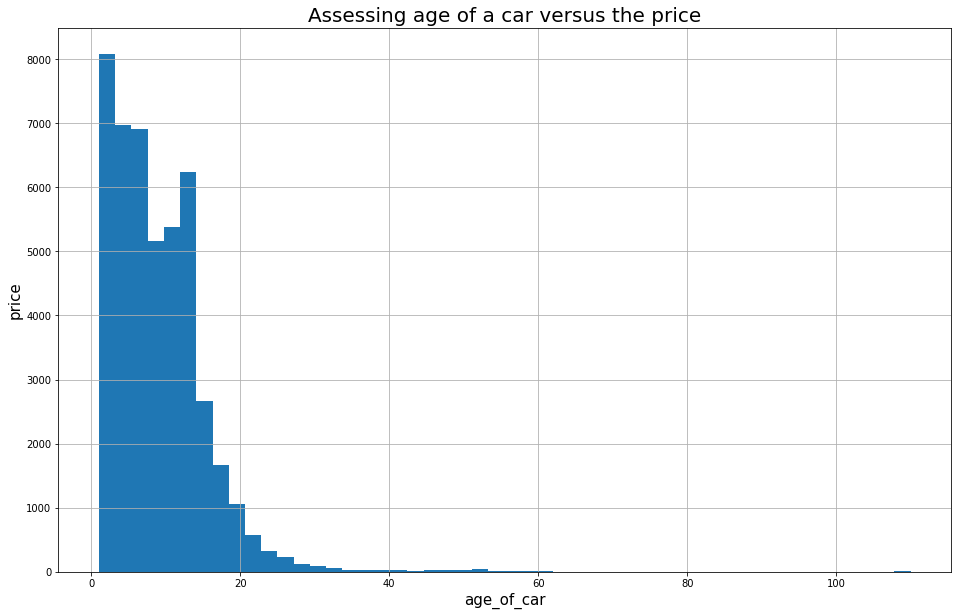

In [4]:
import datetime as dt
#'age_of_car', 'odometer', 'price', 'categorize_car', 'cylinders'
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0) # for some reason I am getting inf values, 

#age of car vs price
df['age_of_car'].hist(bins=50,grid=True, figsize=(16,10))
plt.xlabel("age_of_car", fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Assessing age of a car versus the price', fontsize=20)

Text(0.5, 1.0, 'Assessing odometer of a car versus the price')

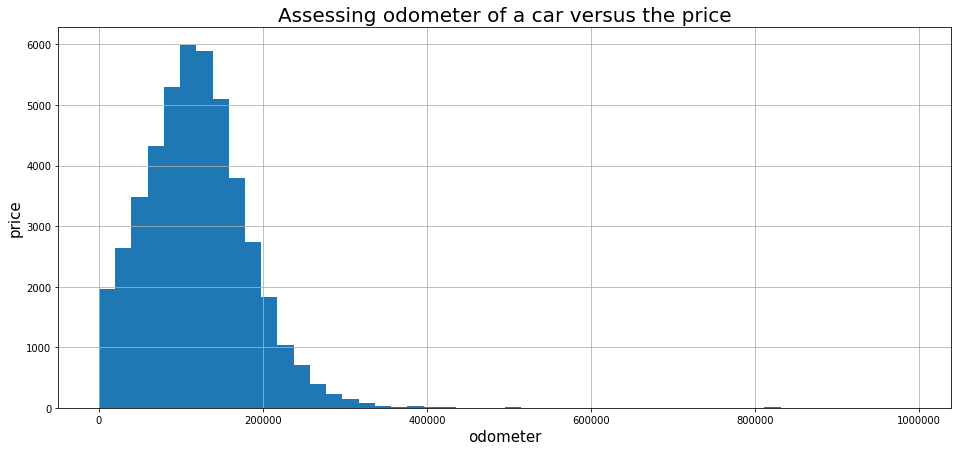

In [5]:
df['odometer'].hist(bins=50,grid=True, figsize=(16,7))
plt.xlabel("odometer", fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Assessing odometer of a car versus the price', fontsize=20)

Text(0.5, 1.0, 'Assessing car condition versus price')

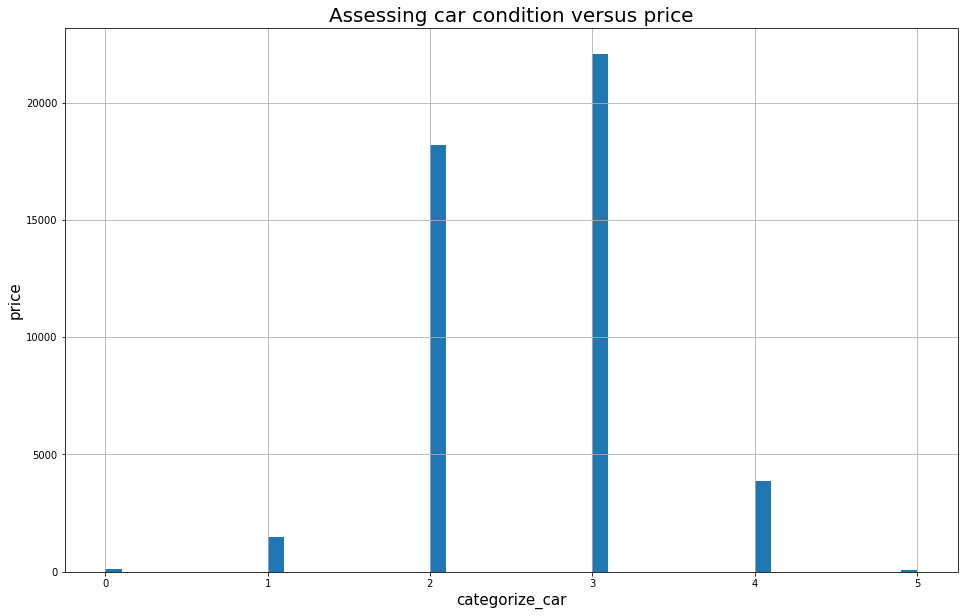

In [6]:
df['categorize_car'].hist(bins=50,grid=True, figsize=(16,10))
plt.xlabel("categorize_car", fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Assessing car condition versus price', fontsize=20)

Text(0.5, 1.0, 'Assessing the amount of cylinders in a car versus price')

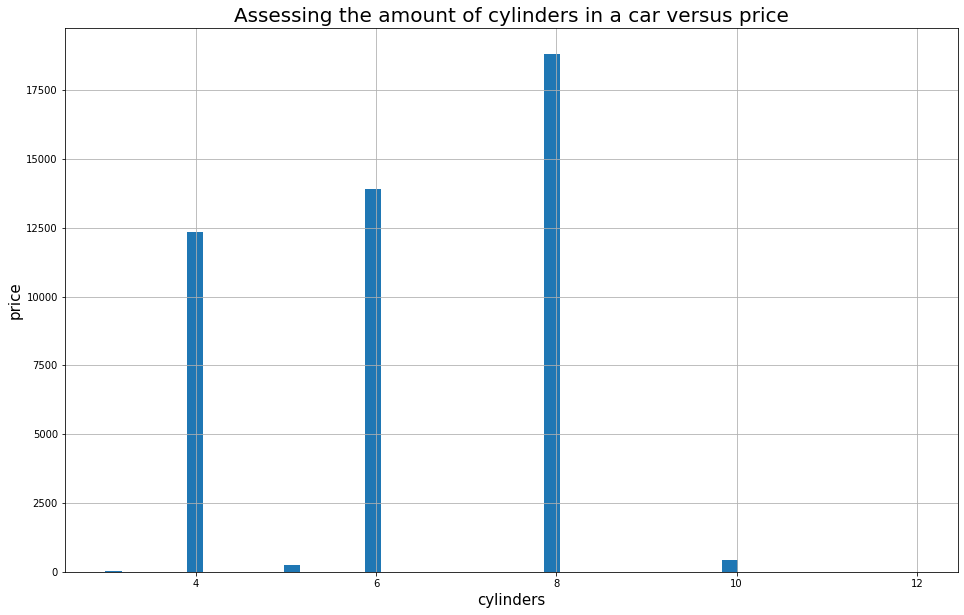

In [7]:
df['cylinders'].hist(bins=50,grid=True, figsize=(16,10))
plt.xlabel("cylinders", fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Assessing the amount of cylinders in a car versus price', fontsize=20)

### 6. <a id='EDA_conclusion'>Exploratory Data Analysis Conclusion</a>

- Price vs. Age of Vehicle: Based on the histogram, it is evident that as the car increases in age, the value of the car goes down. Anything after 30 years seems to be an outlier. 

- Vehicle's age when the ad was placed: Cars that were newly listed were higher in price vs cars that have been listed for a while. After 50 days there is a significant decrease in price of cars. After 100 days outliers start to appear.

- Mileage: Cars that had less miles_per_year were higher in price vs cars that had more mileage.

- Number of Cylinders: Cars that had 8 cylinders were listed with a higher price. Interestingly enough, cars with 10 cylinders were lower in price than cars that had four or 6 cylinders.

- Condition: It is apparent that cars in "good" condition were priced the highest and cars in "like new"

- Odometer: After 300,000 miles, we can consider the rest to be outliers
- Price: After $55,000 outliers appear.

### 7. <a id='outliers'>Removing Outliers from Data</a>

In [18]:
outliers = df[~((df['age_of_car'] < 30 ) & (df['odometer'] < 300000) & (df['price'] < 55000))]
outlier_free = df[(df['age_of_car'] < 30 ) & (df['odometer'] < 300000) & (df['price'] < 55000)]
print(outliers.shape, outlier_free.shape)
# print(outlier_free)

(768, 19) (45010, 19)


- 777 Outliers were removed from the data. 

Text(0.5, 1.0, 'Assessing age of a car versus the price')

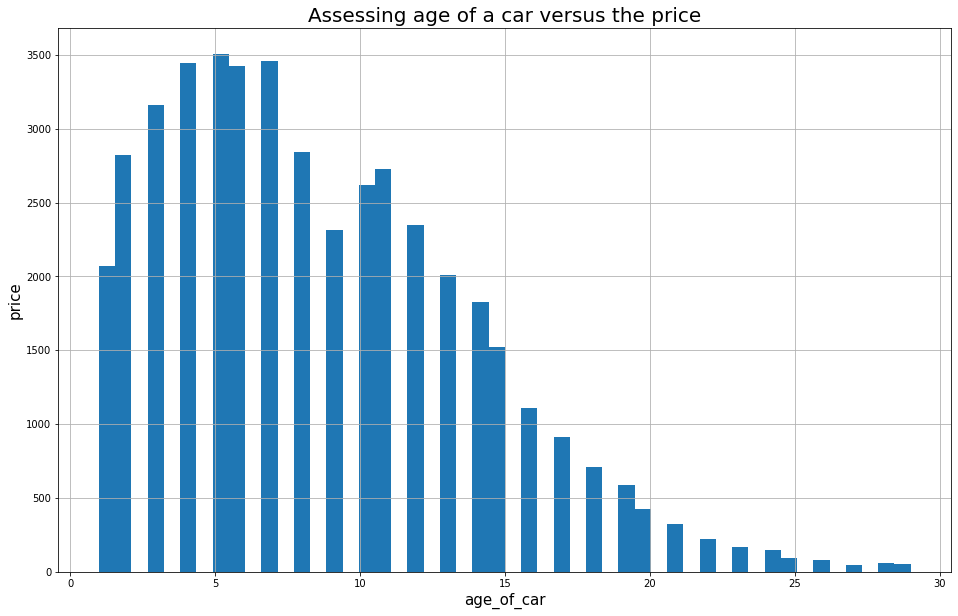

In [9]:
outlier_free['age_of_car'].hist(bins=50,grid=True, figsize=(16,10))
plt.xlabel("age_of_car", fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Assessing age of a car versus the price', fontsize=20)

Text(0.5, 1.0, 'Assessing odometer of a car versus the price')

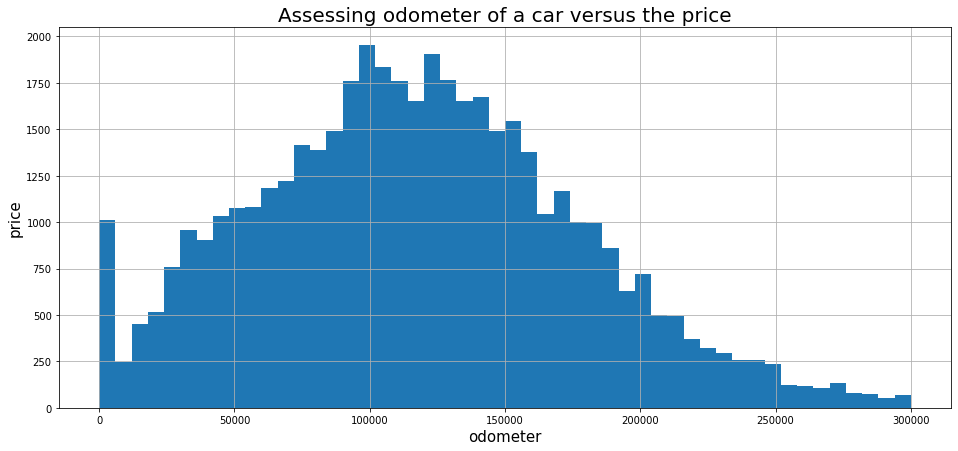

In [10]:
outlier_free['odometer'].hist(bins=50,grid=True, figsize=(16,7))
plt.xlabel("odometer", fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Assessing odometer of a car versus the price', fontsize=20)

====== Values with Outliers ======
3    22079
2    18178
4     3873
1     1490
0       99
5       59
Name: categorize_car, dtype: int64
====== Values w/o Outliers ======
3    21845
2    17812
4     3828
1     1380
0       93
5       52
Name: categorize_car, dtype: int64


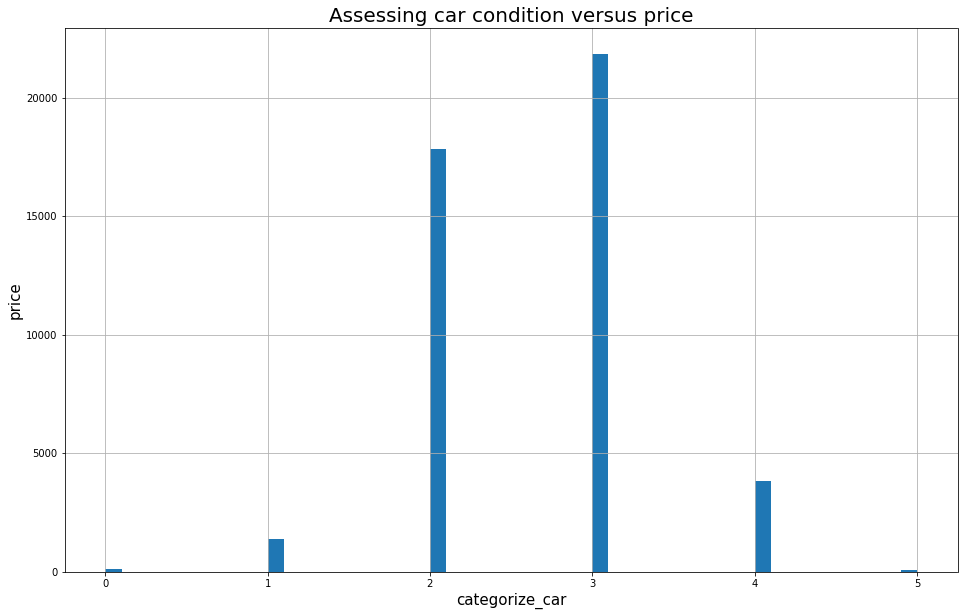

In [11]:
outlier_free['categorize_car'].hist(bins=50,grid=True, figsize=(16,10))
plt.xlabel("categorize_car", fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Assessing car condition versus price', fontsize=20)

print('====== Values with Outliers ======')
print(df['categorize_car'].value_counts())

print('====== Values w/o Outliers ======')
print(outlier_free['categorize_car'].value_counts())

====== Values with Outliers ======
8     18818
6     13902
4     12345
10      436
5       247
3        28
12        2
Name: cylinders, dtype: int64
====== Values w/o Outliers ======
8     18251
6     13767
4     12281
10      434
5       247
3        28
12        2
Name: cylinders, dtype: int64


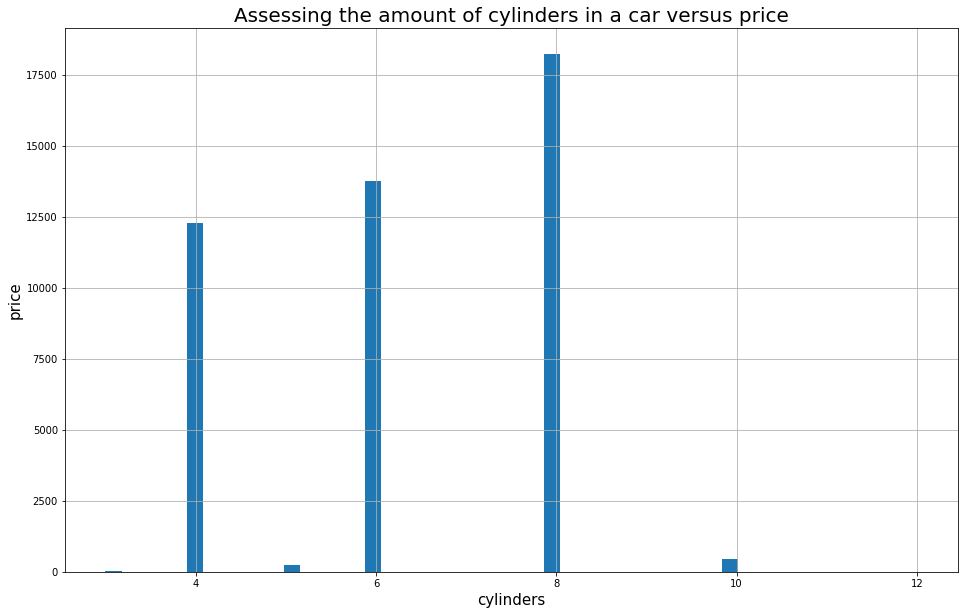

In [12]:
outlier_free['cylinders'].hist(bins=50,grid=True, figsize=(16,10))
plt.xlabel("cylinders", fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Assessing the amount of cylinders in a car versus price', fontsize=20)

print('====== Values with Outliers ======')
print(df['cylinders'].value_counts())

print('====== Values w/o Outliers ======')
print(outlier_free['cylinders'].value_counts())

- Removing the outliers ensures that our distribution is more accurate. I included the count of each value for certain graphs as the comparison between the old and new graph looked similar and a change would not be noticed. 

mean: 39.595378804710066
median: 33.0


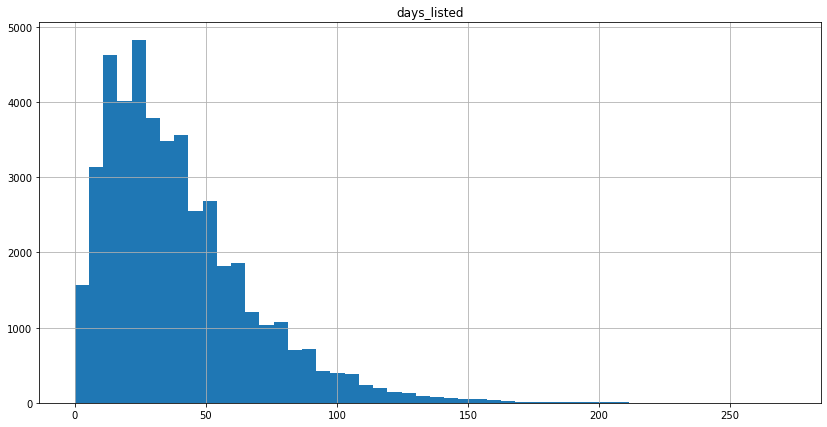

In [13]:
def plot_list(df, col):
    df.hist(column=col, figsize=(14,7), bins=50)
    
for col in ['days_listed']:
    plot_list(outlier_free, col)
    print('mean:', outlier_free[col].mean())
    print('median:', outlier_free[col].median())


### 7.5. <a id='analysis'>Analyzing ads at Crankshaft</a>

Based on the mean and median, I can say that ads usually last for a month (30-40 days) before they are removed. Some sellers leave them for more than 30 days, but others start to remove them around the 30 day mark. 
Some ads were removed after about 10 days of posing and others were left until the 200th + day.

Here I analyze the number of ads and the average price for each type of vehicle. The graphs below will show dependence on the number of ads on the vehicle type.

In [14]:
mean_price = pd.pivot_table(outlier_free, index='model', values='price', aggfunc='mean')
avg_adv = pd.pivot_table(outlier_free, index='model', values='condition', aggfunc='count')
new_df = mean_price.merge(avg_adv, on=['model'])
new_df.head(50)
new_df.tail(50)


,price,condition
model,,
ford taurus,4879.932143,280
gmc acadia,9813.171533,274
gmc sierra,13212.908555,339
gmc sierra 1500,15508.089133,819
gmc sierra 2500hd,20788.322165,388
gmc yukon,14085.871972,289
honda accord,6387.369816,868
honda civic,5937.885106,705
honda civic lx,6261.481481,243


,price
model,
mercedes-benz benze sprinter 2500,34900.000000
chevrolet silverado 1500 crew,27921.396396
ford mustang gt coupe 2d,24871.929368
ford f150 supercrew cab xlt,24723.471572
chevrolet silverado 3500hd,23185.658768


,condition
model,
ford f-150,2453
chevrolet silverado 1500,1893
ram 1500,1560
chevrolet silverado,1085
jeep wrangler,995


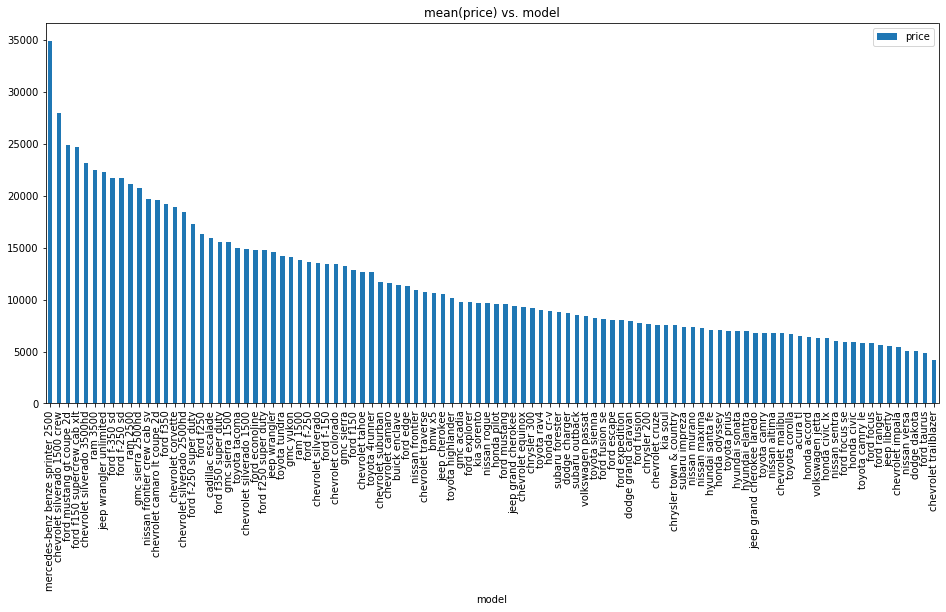

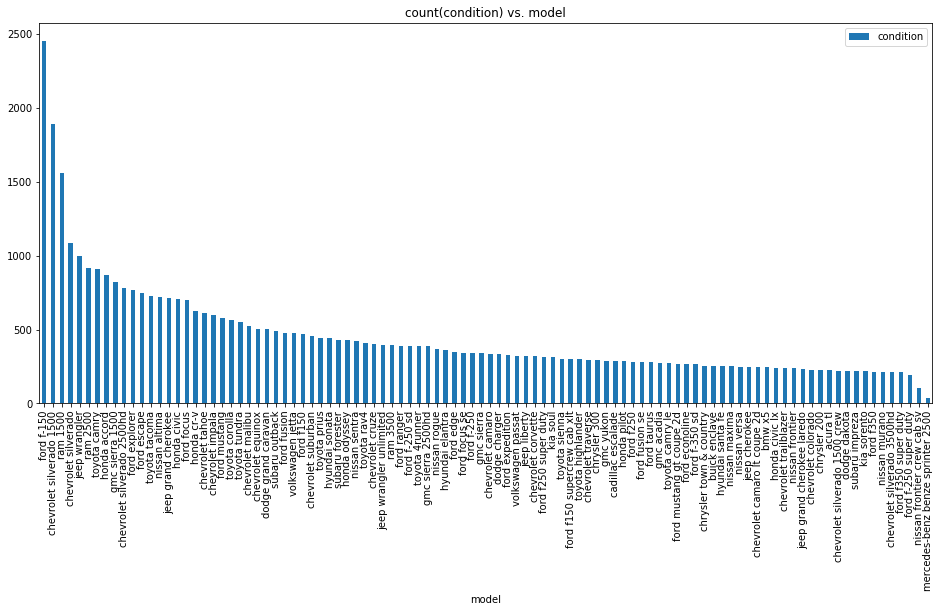

In [15]:
def plot_bar(df, x, y, func):
    title = str(func) + "(" + str(y) + ") vs. " + x
    df_plot = df.pivot_table(index=[x], values=[y], aggfunc=func)
    df_plot.sort_values(by=y, ascending=False).plot(kind='bar', figsize=(16,7), title=title)
    df_new = df_plot.sort_values(by=y, ascending=False).head(5)
    display(df_new)
    return df_new
 
df_mean_price = plot_bar(outlier_free ,'model', 'price', 'mean')
df_popular = plot_bar(outlier_free, 'model', 'condition', 'count')

"Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "

The two car models with the greatest number of ads are the ford f-150 with 2,457 ads and chevrolet silverado 1500


### 8. <a id='conclusion'>Overall Conclusions</a>

,model,odometer,age_of_car,price,categorize_car
3,ford f-150,82931,16,1500,1
39,ford f-150,234000,10,8000,2
50,ford f-150,69698,12,6200,3
140,ford f-150,258225,26,2000,2
192,ford f-150,225000,13,5295,2


,odometer,age_of_car,price,categorize_car
odometer,1,0.410811,-0.495477,-0.286922
age_of_car,0.410811,1,-0.752914,-0.401896
price,-0.495477,-0.752914,1,0.392751
categorize_car,-0.286922,-0.401896,0.392751,1


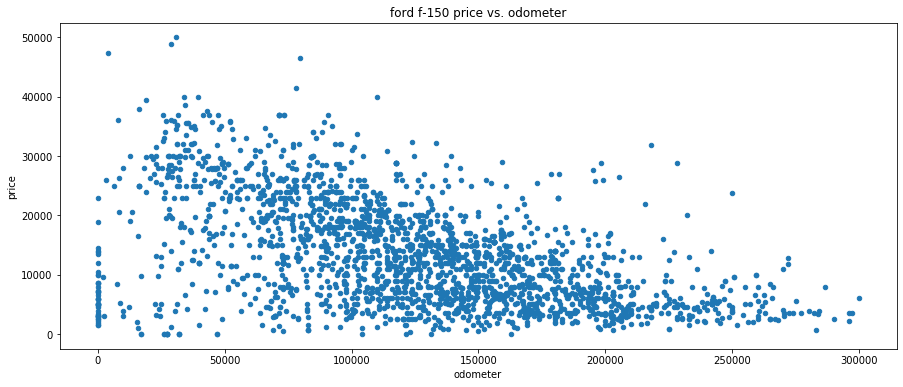

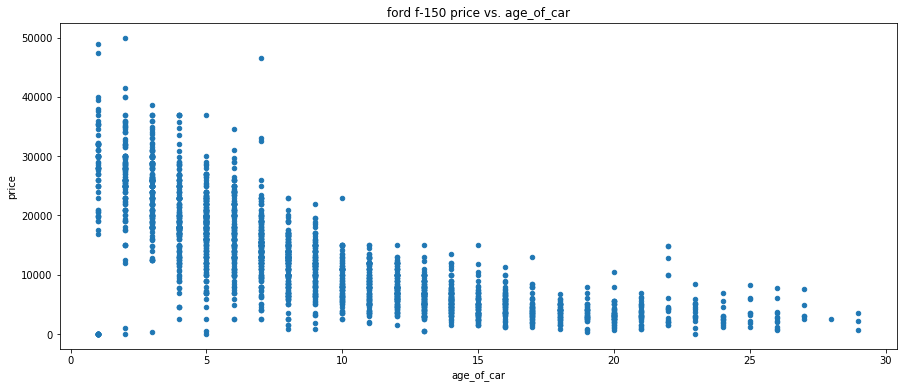

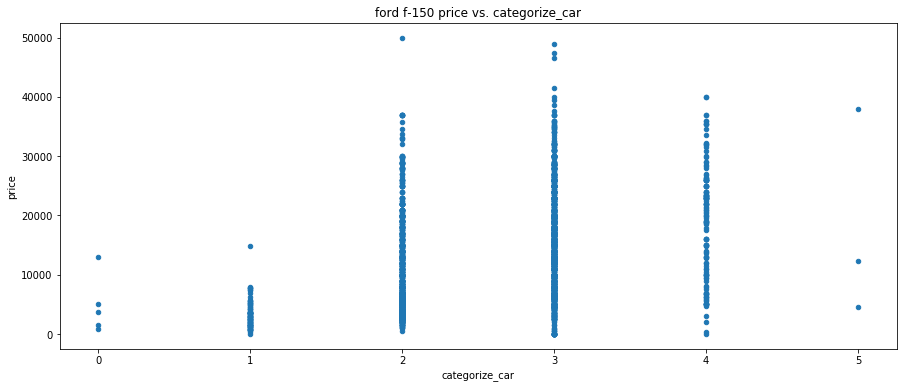

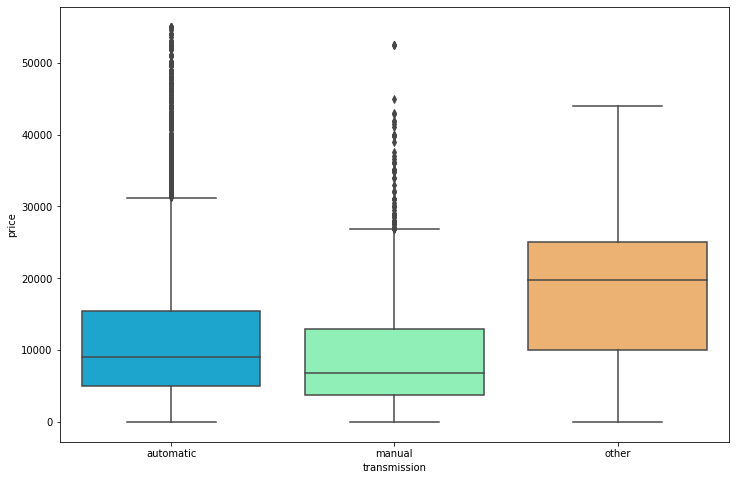

<Figure size 432x288 with 0 Axes>

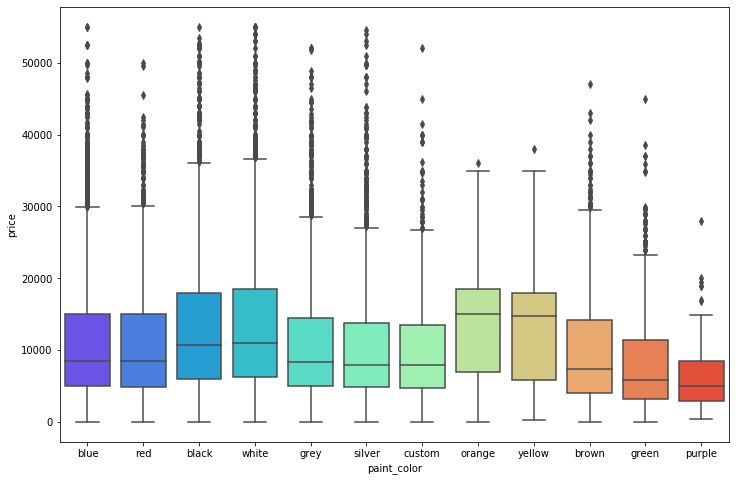

,model,odometer,age_of_car,price,categorize_car
10,chevrolet silverado 1500,128413,7,19500,3
61,chevrolet silverado 1500,137230,5,16999,2
123,chevrolet silverado 1500,92634,3,21595,3
141,chevrolet silverado 1500,151442,8,13995,3
147,chevrolet silverado 1500,13808,1,28250,3


,odometer,age_of_car,price,categorize_car
odometer,1,0.487754,-0.580644,-0.271515
age_of_car,0.487754,1,-0.783876,-0.309528
price,-0.580644,-0.783876,1,0.353041
categorize_car,-0.271515,-0.309528,0.353041,1


<Figure size 432x288 with 0 Axes>

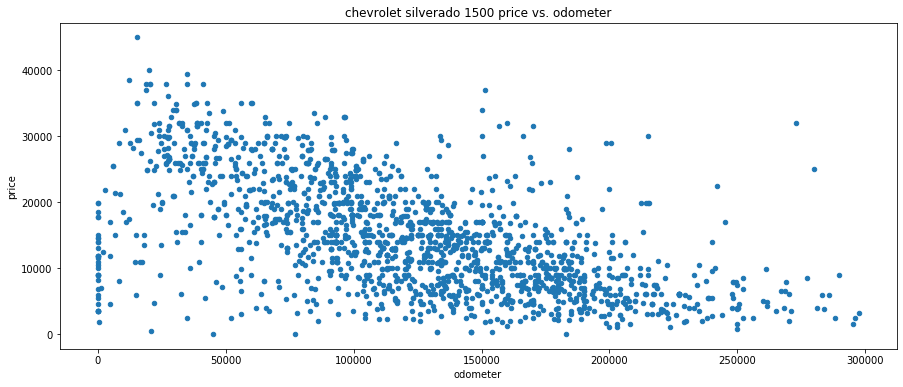

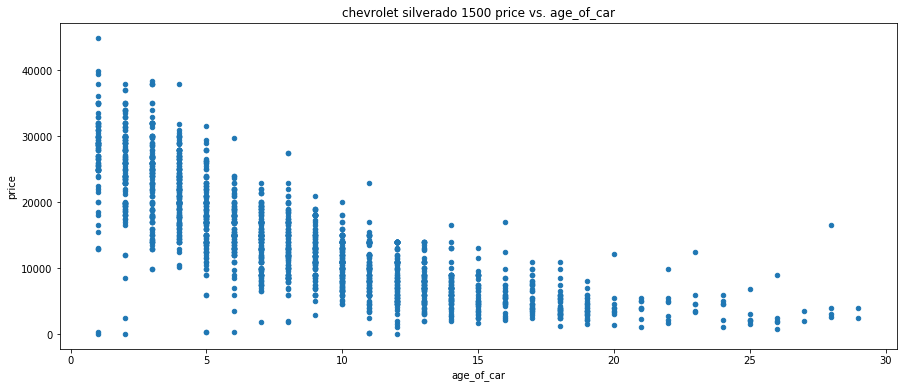

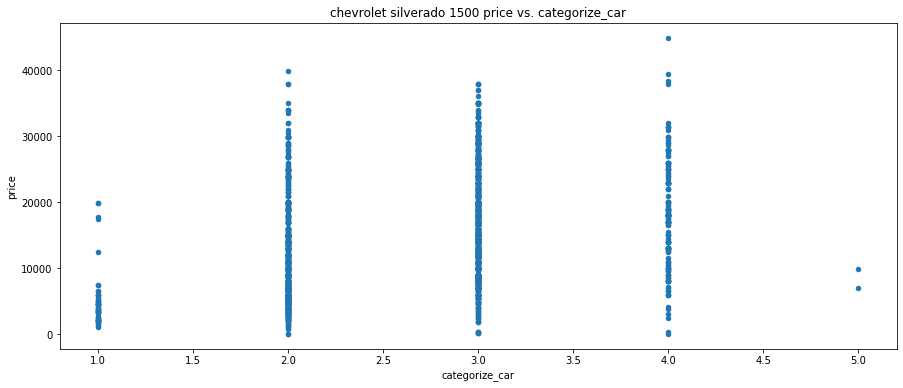

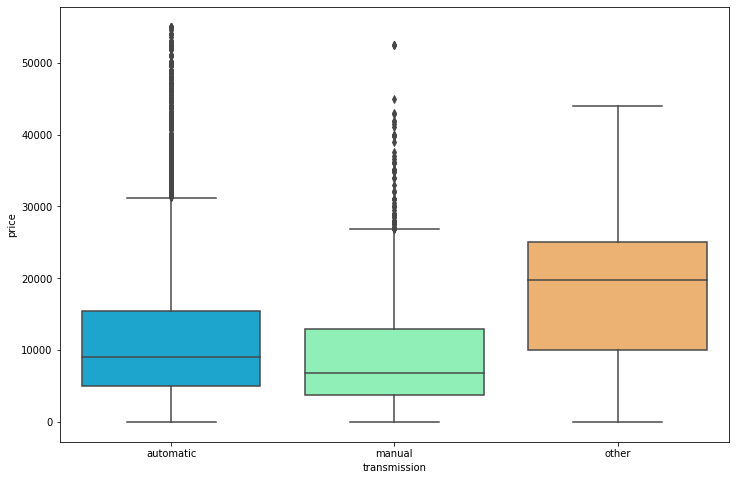

<Figure size 432x288 with 0 Axes>

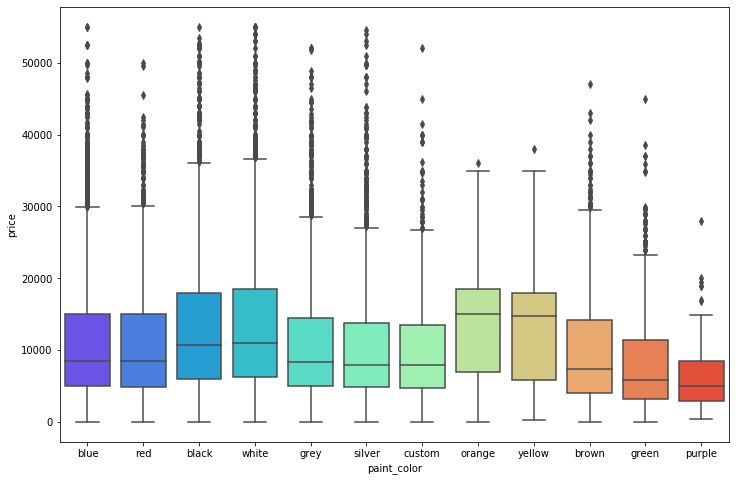

,model,odometer,age_of_car,price,categorize_car
12,ram 1500,140742,7,18990,3
15,ram 1500,127460,5,17990,3
16,ram 1500,130725,8,14990,3
60,ram 1500,146000,14,13000,2
67,ram 1500,114773,7,14950,3


,odometer,age_of_car,price,categorize_car
odometer,1,0.477183,-0.509694,-0.265894
age_of_car,0.477183,1,-0.749707,-0.399118
price,-0.509694,-0.749707,1,0.374541
categorize_car,-0.265894,-0.399118,0.374541,1


<Figure size 432x288 with 0 Axes>

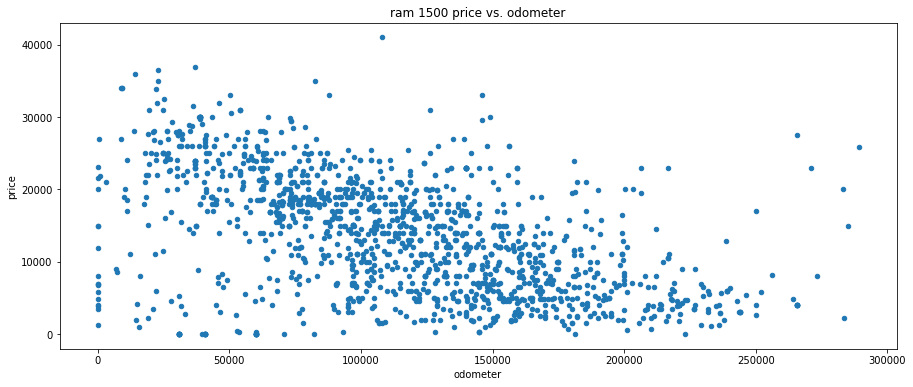

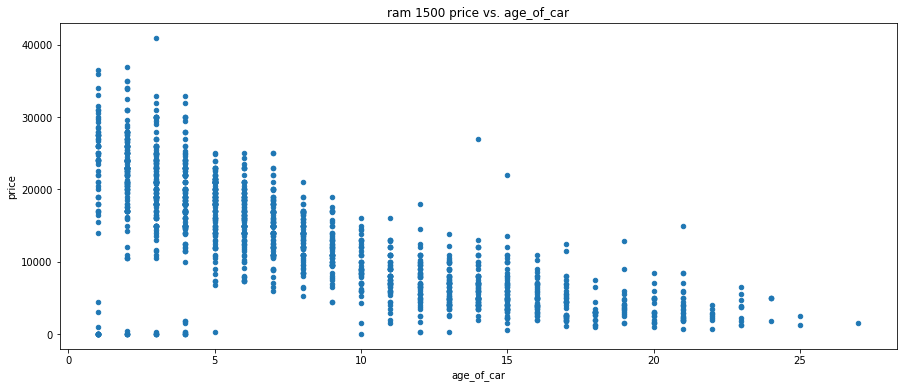

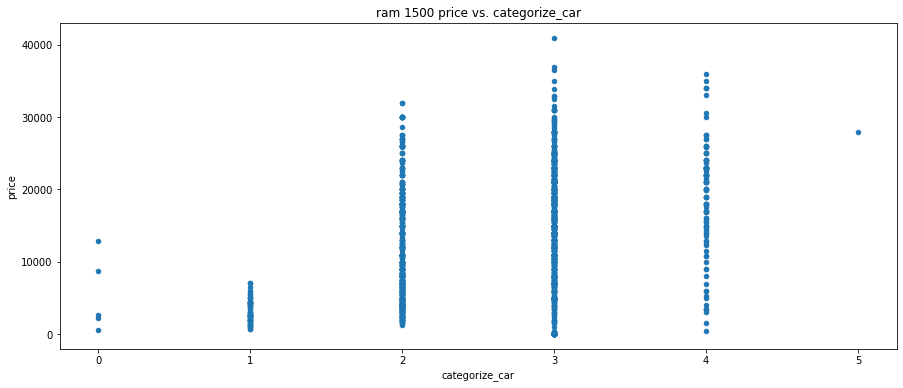

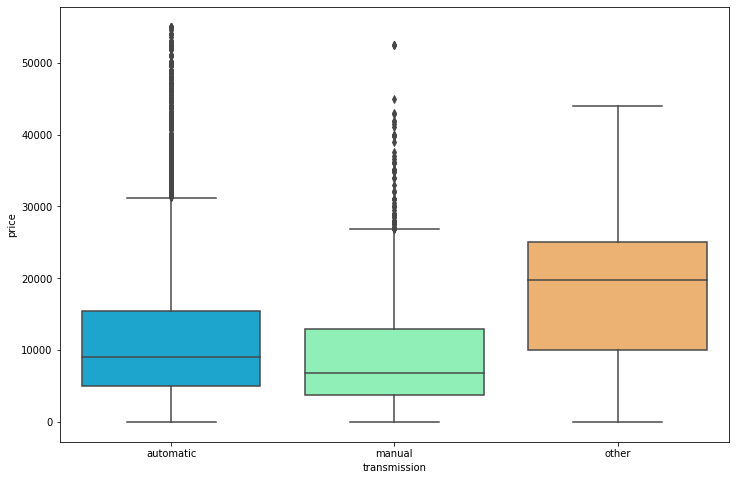

<Figure size 432x288 with 0 Axes>

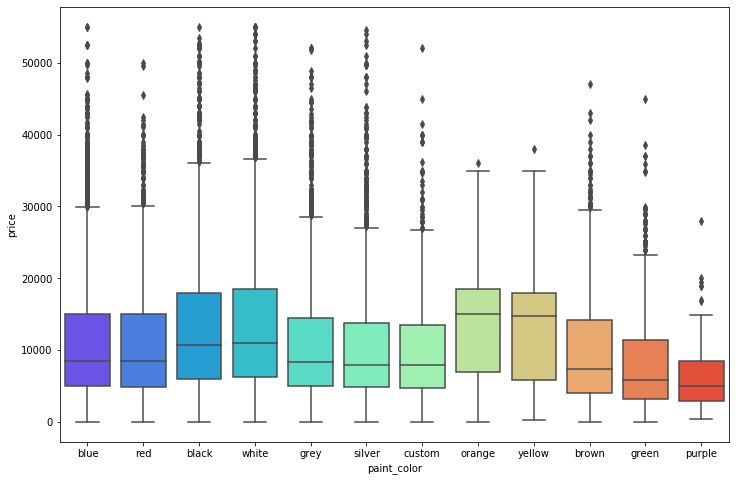

,model,odometer,age_of_car,price,categorize_car
22,chevrolet silverado,180000,15,7500,4
83,chevrolet silverado,170000,11,11950,2
92,chevrolet silverado,230000,15,2950,2
353,chevrolet silverado,53000,2,28000,4
355,chevrolet silverado,150000,4,25000,2


,odometer,age_of_car,price,categorize_car
odometer,1,0.440709,-0.494482,-0.379805
age_of_car,0.440709,1,-0.723213,-0.448007
price,-0.494482,-0.723213,1,0.541624
categorize_car,-0.379805,-0.448007,0.541624,1


<Figure size 432x288 with 0 Axes>

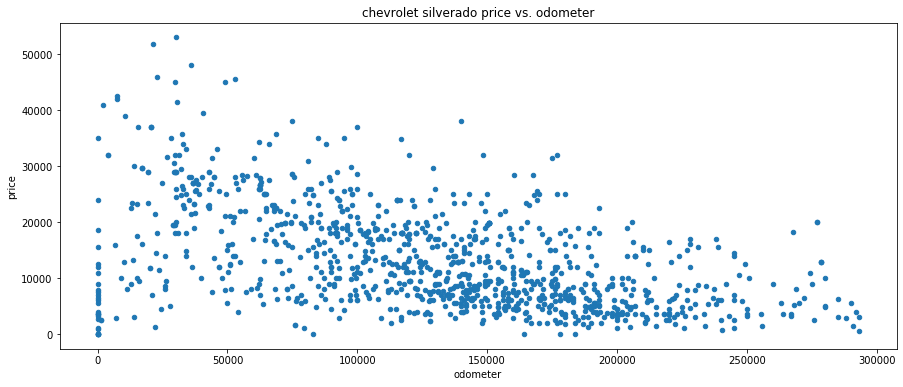

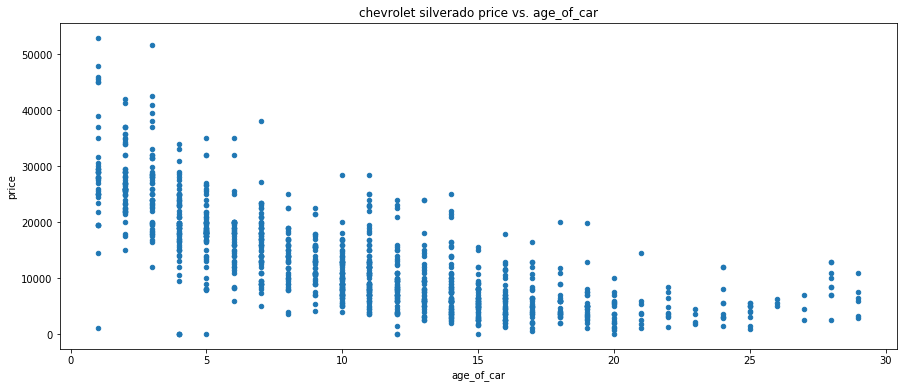

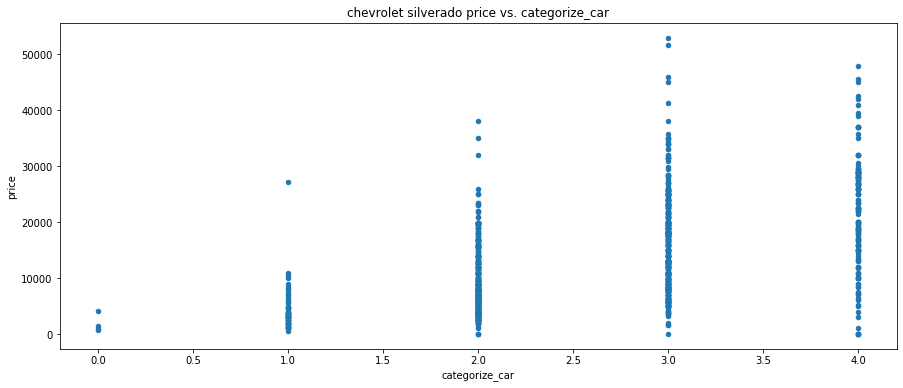

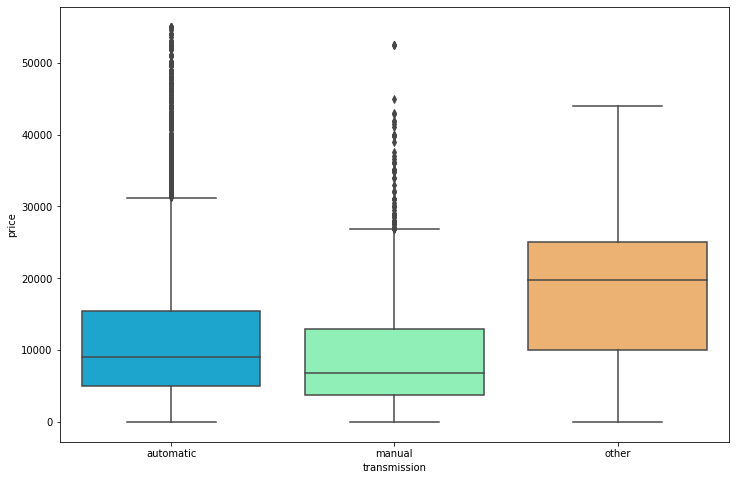

<Figure size 432x288 with 0 Axes>

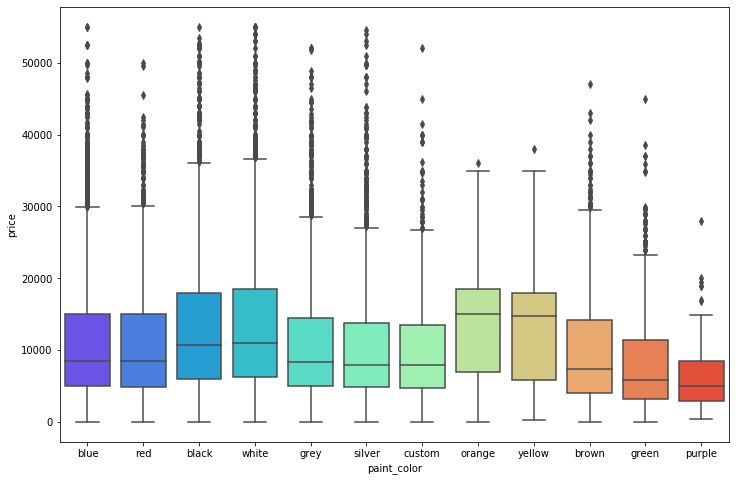

,model,odometer,age_of_car,price,categorize_car
23,jeep wrangler,146005,14,7500,2
145,jeep wrangler,138806,5,15995,3
151,jeep wrangler,118371,8,14995,3
182,jeep wrangler,97211,15,11950,3
183,jeep wrangler,85490,8,16950,3


,odometer,age_of_car,price,categorize_car
odometer,1,0.447072,-0.410064,-0.249265
age_of_car,0.447072,1,-0.591071,-0.256854
price,-0.410064,-0.591071,1,0.238454
categorize_car,-0.249265,-0.256854,0.238454,1


<Figure size 432x288 with 0 Axes>

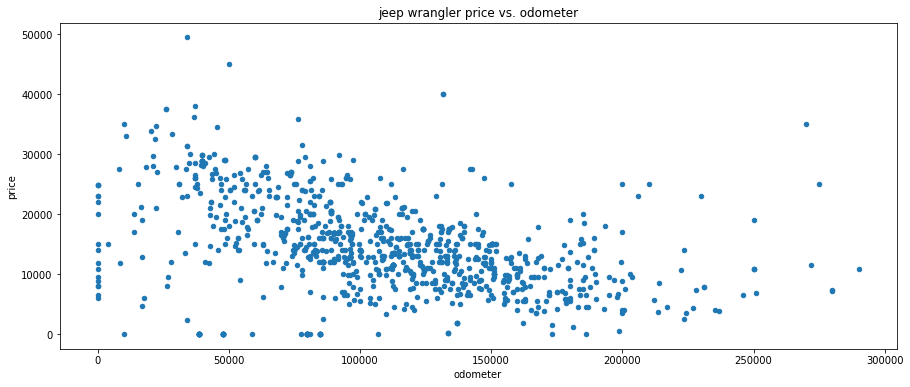

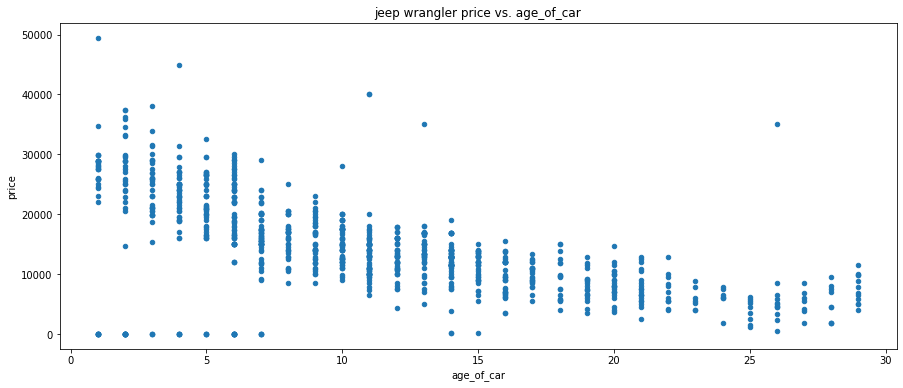

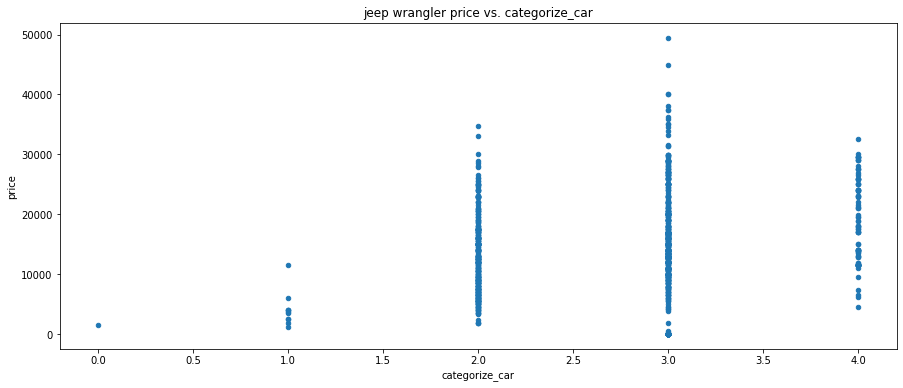

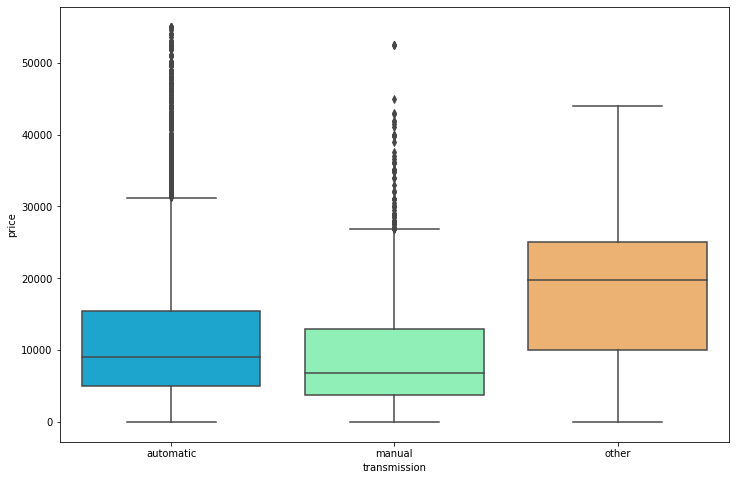

<Figure size 432x288 with 0 Axes>

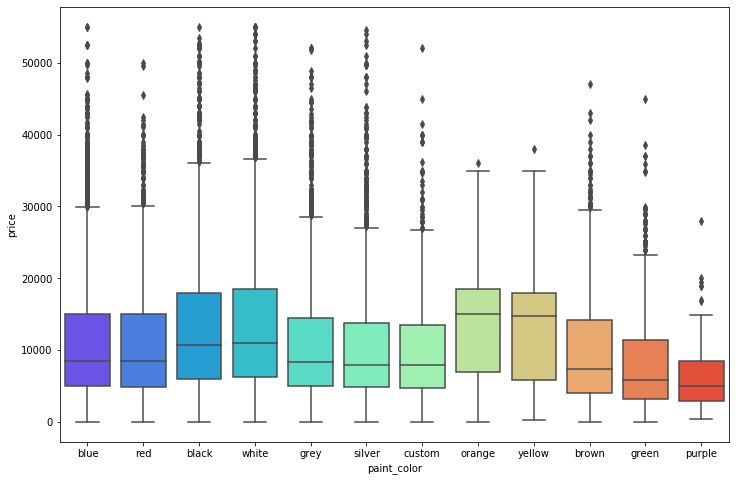

<Figure size 432x288 with 0 Axes>

In [16]:
import seaborn as sns

#car_info = outlier_free[['model', 'price', 'odometer', 'age_of_car']].copy()
#car_info.head(10)
#car_correlation = car_info.corr()

def scatt(df, x, y, i):
    title= i + ' '+ str(y) + " vs. " + x
    df.plot.scatter(x=x, y=y, figsize=(15,6), title=title)
    plt.show()
    
def box_car(df, x, y, i):
    plt.figure();
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    sns.boxplot(x=x, y=y, data=outlier_free, palette='rainbow')
    plt.show()
    plt.clf()
    
for i in df_popular.index.tolist():
    car_info = outlier_free.loc[df['model'] == i,['model', 'odometer', 'age_of_car', 'price', 'categorize_car']]
    display(car_info.head(5))
    corr = car_info.corr()
    display(corr.style.background_gradient(cmap='coolwarm'))
    scatt(car_info, 'odometer', 'price', i)
    scatt(car_info, 'age_of_car', 'price', i)
    scatt(car_info, 'categorize_car', 'price', i)
    box_car(car_info, 'transmission', 'price', i)
    box_car(car_info, 'paint_color', 'price', i)
    print("=="*60)
    

**Conclusion:**

In the beginning I mentioned that I would analyze which factors had an influence on the price a car would be listed for on CrankShaft List. I analyzed the most listed cars on CrankShaft List. 

Ford f-150 - Indicated a moderate positive correlation between the age of the car and the odometer (.41). There also existed a weak positive correlation of .35 between the category of the car and the price. 

Ram 1500 - Moderate positive correlation between the age of a car and odometer (.48) and weak positive correlation between category and price (.37).

Chevy Silverado - Moderate positive correlation between the price and the category of the car (.54). Moderate positive correlation between age of car and the odometer (.43).

Jeep Wrangler - Moderate positive correlation between the age of the car and odometer (.46) and weak positive correlation between category of the car and the price (.23).

My findings indicate the combination of the age og the car + the odometer had more of an influence on the price than the category or condition of the car.  

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn